In [50]:
#  https://www.jianshu.com/p/5db596333dfb

In [15]:
setwd('/import/hd/sc')

In [16]:
library(nichenetr)
library(Seurat) # please update to Seurat V4
library(tidyverse)

In [17]:
seuratObj <- readRDS('./sce2.merged.rds')
seuratObj@meta.data %>% head()
seuratObj@meta.data$celltype %>% table() 

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.8,seurat_clusters,RNA_snn_res.0.2,group,RNA_snn_res.0.1,RNA_snn_res.0.05,RNA_snn_res.0.01,celltype
,<chr>,<dbl>,<int>,<dbl>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<chr>
AAACCCAAGAGCTGCA-1_1,OA_1,2943.740,2444,6.932801,1,0,0,OA,0,0,0,Fib0
AAACCCAAGATACTGA-1_1,OA_1,2711.597,1861,7.326082,18,2,4,OA,4,1,2,Endo
AAACCCAAGGTTAGTA-1_1,OA_1,3130.363,3134,8.936478,16,0,0,OA,0,0,0,Fib0
AAACCCAAGTCCCGGT-1_1,OA_1,2801.367,1764,6.752836,7,1,3,OA,3,3,1,Resid.Macro
AAACCCACACTTCTCG-1_1,OA_1,3304.690,3167,4.371079,1,0,0,OA,0,0,0,Fib0
AAACCCAGTAGCTAAA-1_1,OA_1,3042.776,3386,13.734073,2,0,1,OA,1,0,0,Fib1


.
          ADs           ECs          Endo          Fib0          Fib1 
           39           642          8181         20971         12432 
         Fib2 Inflamm.Macro      Lymphoid      Pericyte   Resid.Macro 
            2          1469          3964          2143          3012 
          SMC    SPP1_macro        macro1        macro2        macro3 
         3251           372           989           202           197 
       macro4          mono 
           63          3921 

In [18]:
organism = "human"
lr_network = readRDS("/import/DB/nichenetr/lr_network_human_21122021.rds")

In [19]:
ligand_target_matrix=readRDS("/import/DB/nichenetr/ligand_target_matrix_nsga2r_final.rds")
weighted_networks = readRDS("/import/DB/nichenetr/weighted_networks_nsga2r_final.rds")
ligand_target_matrix <- readRDS("/import/DB/nichenetr/ligand_target_matrix_nsga2r_final.rds")
ligand_target_matrix[1:5,1:5] # target genes in rows, ligands in columns

,A2M,AANAT,ABCA1,ACE,ACE2
A-GAMMA3'E,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000
A1BG,0.0018503922,0.0011108718,0.0014225077,0.0028594037,0.001139013
A1BG-AS1,0.0007400797,0.0004677614,0.0005193137,0.0007836698,0.000375007
A1CF,0.0024799266,0.0013026348,0.0020420890,0.0047921048,0.003273375
A2M,0.0084693452,0.0040689323,0.0064256379,0.0105191365,0.005719199


In [20]:
lr_network <- readRDS('/import/DB/nichenetr/lr_network_human_21122021.rds')
lr_network = lr_network %>% distinct(from, to)
head(lr_network)

from,to
<chr>,<chr>
A2M,MMP2
A2M,MMP9
A2M,LRP1
A2M,KLK3
AANAT,MTNR1A
AANAT,MTNR1B


In [21]:
weighted_networks <- readRDS('/import/DB/nichenetr/weighted_networks_nsga2r_final.rds')
weighted_networks_lr = weighted_networks$lr_sig %>% inner_join(lr_network, by = c("from","to"))
head(weighted_networks$lr_sig)

from,to,weight
<chr>,<chr>,<dbl>
A-GAMMA3'E,ACTG1P11,0.10018411
A-GAMMA3'E,AXIN2,0.08687722
A-GAMMA3'E,BUB1B-PAK6,0.09322200
A-GAMMA3'E,CEACAM7,0.07927829
A-GAMMA3'E,CHRNA1,0.09010287
A-GAMMA3'E,DTX2P1,0.09758541


In [22]:
head(weighted_networks$gr) 

from,to,weight
<chr>,<chr>,<dbl>
A1BG,A2M,0.16500026
AAAS,GFAP,0.09064868
AADAC,CTAG1B,0.10358772
AADAC,CYP3A4,0.17727654
AADAC,DIRAS3,0.09359021
AADAC,IRF8,0.08918009


In [23]:
table(seuratObj$celltype)


          ADs           ECs          Endo          Fib0          Fib1 
           39           642          8181         20971         12432 
         Fib2 Inflamm.Macro      Lymphoid      Pericyte   Resid.Macro 
            2          1469          3964          2143          3012 
          SMC    SPP1_macro        macro1        macro2        macro3 
         3251           372           989           202           197 
       macro4          mono 
           63          3921 

In [24]:
Idents(seuratObj) = 'group'

In [25]:
table(seuratObj$group)


Healthy      OA 
  33154   28696 

In [31]:
Idents(seuratObj) = 'group'

In [32]:
seuratObj = subset(seuratObj,idents = 'OA')

In [33]:
seuratObj@meta.data$celltype_aggregate = paste(seuratObj@meta.data$celltype, seuratObj@meta.data$group,sep = "_") # user adaptation required on own dataset
#DimPlot(seuratObj, group.by = "celltype_aggregate")

In [34]:
table(seuratObj$celltype_aggregate)


          ADs_OA           ECs_OA          Endo_OA          Fib0_OA 
               5               48             3251            10057 
         Fib1_OA          Fib2_OA Inflamm.Macro_OA      Lymphoid_OA 
            6802                2              428             2520 
     Pericyte_OA   Resid.Macro_OA           SMC_OA    SPP1_macro_OA 
             315              804             1048              158 
       macro1_OA        macro2_OA        macro3_OA        macro4_OA 
             454               53               34               27 
         mono_OA 
            2690 

In [58]:
condition_oi = 'SPP1_macro_OA'
condition_ref = c('Inflamm.Macro_OA','Resid.Macro_OA','macro1_OA','macro2_OA','macro3_OA','macro4_OA')

In [69]:
DE_table_receiver <-  FindMarkers(object = seuratObj,
                                  ident.1 = condition_oi, ident.2 = condition_ref,
                                  group.by = "celltype_aggregate",
                                  min.pct = 0.05) %>% rownames_to_column("gene")

geneset_oi <- DE_table_receiver %>% filter(p_val_adj <= 0.05 & abs(avg_log2FC) >= 0) %>% pull(gene)
geneset_oi <- geneset_oi %>% .[. %in% rownames(ligand_target_matrix)]

In [60]:
Idents(seuratObj) = 'celltype_aggregate'

In [61]:
receiver = "Inflamm.Macro_OA"
expressed_genes_receiver <- get_expressed_genes(receiver, seuratObj, pct = 0.05)

In [62]:
background_expressed_genes <- expressed_genes_receiver %>% .[. %in% rownames(ligand_target_matrix)]
length(background_expressed_genes)

[1] 6589

In [63]:
all_receptors <- unique(lr_network$to)  
expressed_receptors <- intersect(all_receptors, expressed_genes_receiver)
potential_ligands <- lr_network %>% filter(to %in% expressed_receptors) %>% pull(from) %>% unique()

In [64]:
ligand_activities <- predict_ligand_activities(geneset = geneset_oi,
                                               background_expressed_genes = background_expressed_genes,
                                               ligand_target_matrix = ligand_target_matrix,
                                               potential_ligands = potential_ligands)

ligand_activities <- ligand_activities %>% arrange(-aupr_corrected) %>% mutate(rank = rank(desc(aupr_corrected)))
ligand_activities

Warning message in evaluate_target_prediction(setting, ligand_target_matrix, ligands_position):
"all target gene probability score predictions have same value"
Warning message in cor(prediction, response):
"the standard deviation is zero"
Warning message in cor(prediction, response, method = "s"):
"the standard deviation is zero"


test_ligand,auroc,aupr,aupr_corrected,pearson,rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IGFL3,0.5000000,0.5344493,0.46555074,NA,1
ANGPTL4,0.6783735,0.2002301,0.13133163,0.23549524,2
FGF2,0.6737398,0.1700975,0.10119902,0.20828586,3
IGFL1,0.6449080,0.1657442,0.09684564,0.19834390,4
AGRP,0.6786224,0.1603320,0.09143345,0.19274263,5
AREG,0.6654234,0.1588087,0.08991021,0.18917075,6
RSPO2,0.6471141,0.1583369,0.08943841,0.17227742,7
CCN4,0.6410142,0.1575892,0.08869072,0.16271170,8
BMP2,0.6770323,0.1525238,0.08362527,0.17620406,9


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


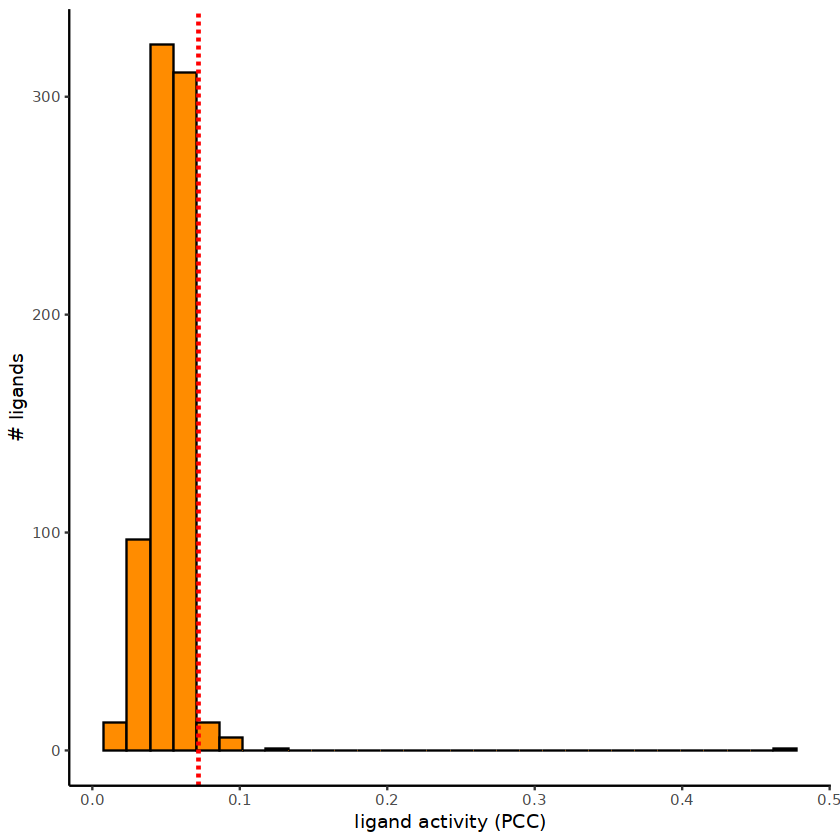

In [65]:
p_hist_lig_activity <- ggplot(ligand_activities, aes(x=aupr_corrected)) + 
  geom_histogram(color="black", fill="darkorange")  + 
  geom_vline(aes(xintercept=min(ligand_activities %>% top_n(20, aupr_corrected) %>% pull(aupr_corrected))),
             color="red", linetype="dashed", size=1) + 
  labs(x="ligand activity (PCC)", y = "# ligands") +
  theme_classic()

p_hist_lig_activity

In [66]:
best_upstream_ligands <- ligand_activities %>% top_n(30, aupr_corrected) %>% arrange(-aupr_corrected) %>% pull(test_ligand)

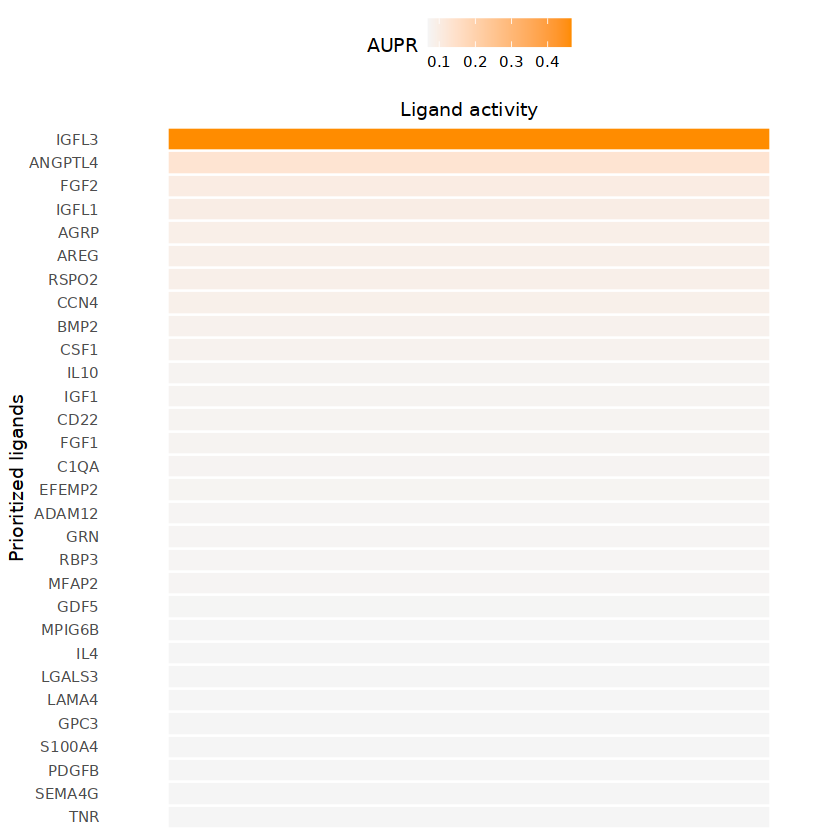

In [67]:
vis_ligand_aupr <- ligand_activities %>% filter(test_ligand %in% best_upstream_ligands) %>%
  column_to_rownames("test_ligand") %>% select(aupr_corrected) %>% arrange(aupr_corrected) %>% as.matrix(ncol = 1)

(make_heatmap_ggplot(vis_ligand_aupr,
                     "Prioritized ligands", "Ligand activity", 
                     legend_title = "AUPR", color = "darkorange") + 
    theme(axis.text.x.top = element_blank()))  

In [14]:
Idents(seuratObj) <- 'celltype'
receiver = "Inflamm.Macro"
expressed_genes_receiver = get_expressed_genes(receiver, seuratObj, pct = 0.10)
background_expressed_genes = expressed_genes_receiver %>% .[. %in% rownames(ligand_target_matrix)]
## sender
sender_celltypes = c("SPP1_macro")
list_expressed_genes_sender = sender_celltypes %>% unique() %>% lapply(get_expressed_genes, seuratObj, 0.10) # lapply to get the expressed genes of every sender cell type separately here
expressed_genes_sender = list_expressed_genes_sender %>% unlist() %>% unique()

### https://lishensuo.github.io/posts/bioinfo/029%E5%8D%95%E7%BB%86%E8%83%9E%E5%88%86%E6%9E%90%E5%B7%A5%E5%85%B7--nichenet%E7%BB%86%E8%83%9E%E9%80%9A%E8%AE%AF%E5%88%86%E6%9E%90/

In [15]:
table(seuratObj$group)


Healthy      OA 
  33154   28696 

In [44]:
nichenet_output =  nichenet_seuratobj_aggregate(
  seurat_obj = seuratObj, # Seurat对象，其active.ident需设置为细胞类型
  expression_pct = 0.10,  # 界定细胞类型是否表达配/受体的比例阈值，默认为0.1
  #organism = "human", # 交代物种信息，默认为人类 c("human","mouse")
  #Group
  condition_colname = "group",   # 交代分组的meta名
  condition_oi = "OA", condition_reference = "Healthy", # 交代实验组与对照组名 
  # receiver
  receiver = "Inflamm.Macro",  # 交代receiver细胞类型
  geneset = "up", # 判断特定基因集的方法，默认使用全部差异基因(oi/ref)c("DE","up","down")
  lfc_cutoff = 0.25, # 判断差异基因的阈值
  # sender
  sender = c("SPP1_macro"), #设置可能的sender cell 
  top_n_targets = 200,  #每个ligand最多考虑200个target gene
  top_n_ligands = 20,   #给出最有可能的20个上游ligand
  cutoff_visualization = 0.33,  #设置可视化ligand-target scores的阈值
  # refer data
  ligand_target_matrix = ligand_target_matrix, 
  lr_network = lr_network, 
  weighted_networks = weighted_networks, 
  )


[1] "Read in and process NicheNet's networks"
[1] "Define expressed ligands and receptors in receiver and sender cells"
[1] "Perform DE analysis in receiver cell"
[1] "Perform NicheNet ligand activity analysis"
[1] "Infer active target genes of the prioritized ligands"
[1] "Infer receptors of the prioritized ligands"
[1] "Perform DE analysis in sender cells"


Warning message:
"Only one identity present, the expression values will be not scaled"


In [45]:
nichenet_output %>% names()

[1] "ligand_activities"                     
 [2] "top_ligands"                           
 [3] "top_targets"                           
 [4] "top_receptors"                         
 [5] "ligand_target_matrix"                  
 [6] "ligand_target_heatmap"                 
 [7] "ligand_target_df"                      
 [8] "ligand_expression_dotplot"             
 [9] "ligand_differential_expression_heatmap"
[10] "ligand_activity_target_heatmap"        
[11] "ligand_receptor_matrix"                
[12] "ligand_receptor_heatmap"               
[13] "ligand_receptor_df"                    
[14] "geneset_oi"                            
[15] "background_expressed_genes"

In [46]:
nichenet_output$top_ligands

[1] "CSF1"    "COPA"    "CCN2"    "CD52"    "ITGB2"   "TGM2"    "LRPAP1" 
 [8] "IL1RN"   "ANXA1"   "MICB"    "ANXA2"   "COL1A1"  "CD59"    "PLTP"   
[15] "PLA2G2A" "IL10"    "HMGB1"   "SIRPA"   "HBEGF"   "ADAM17"

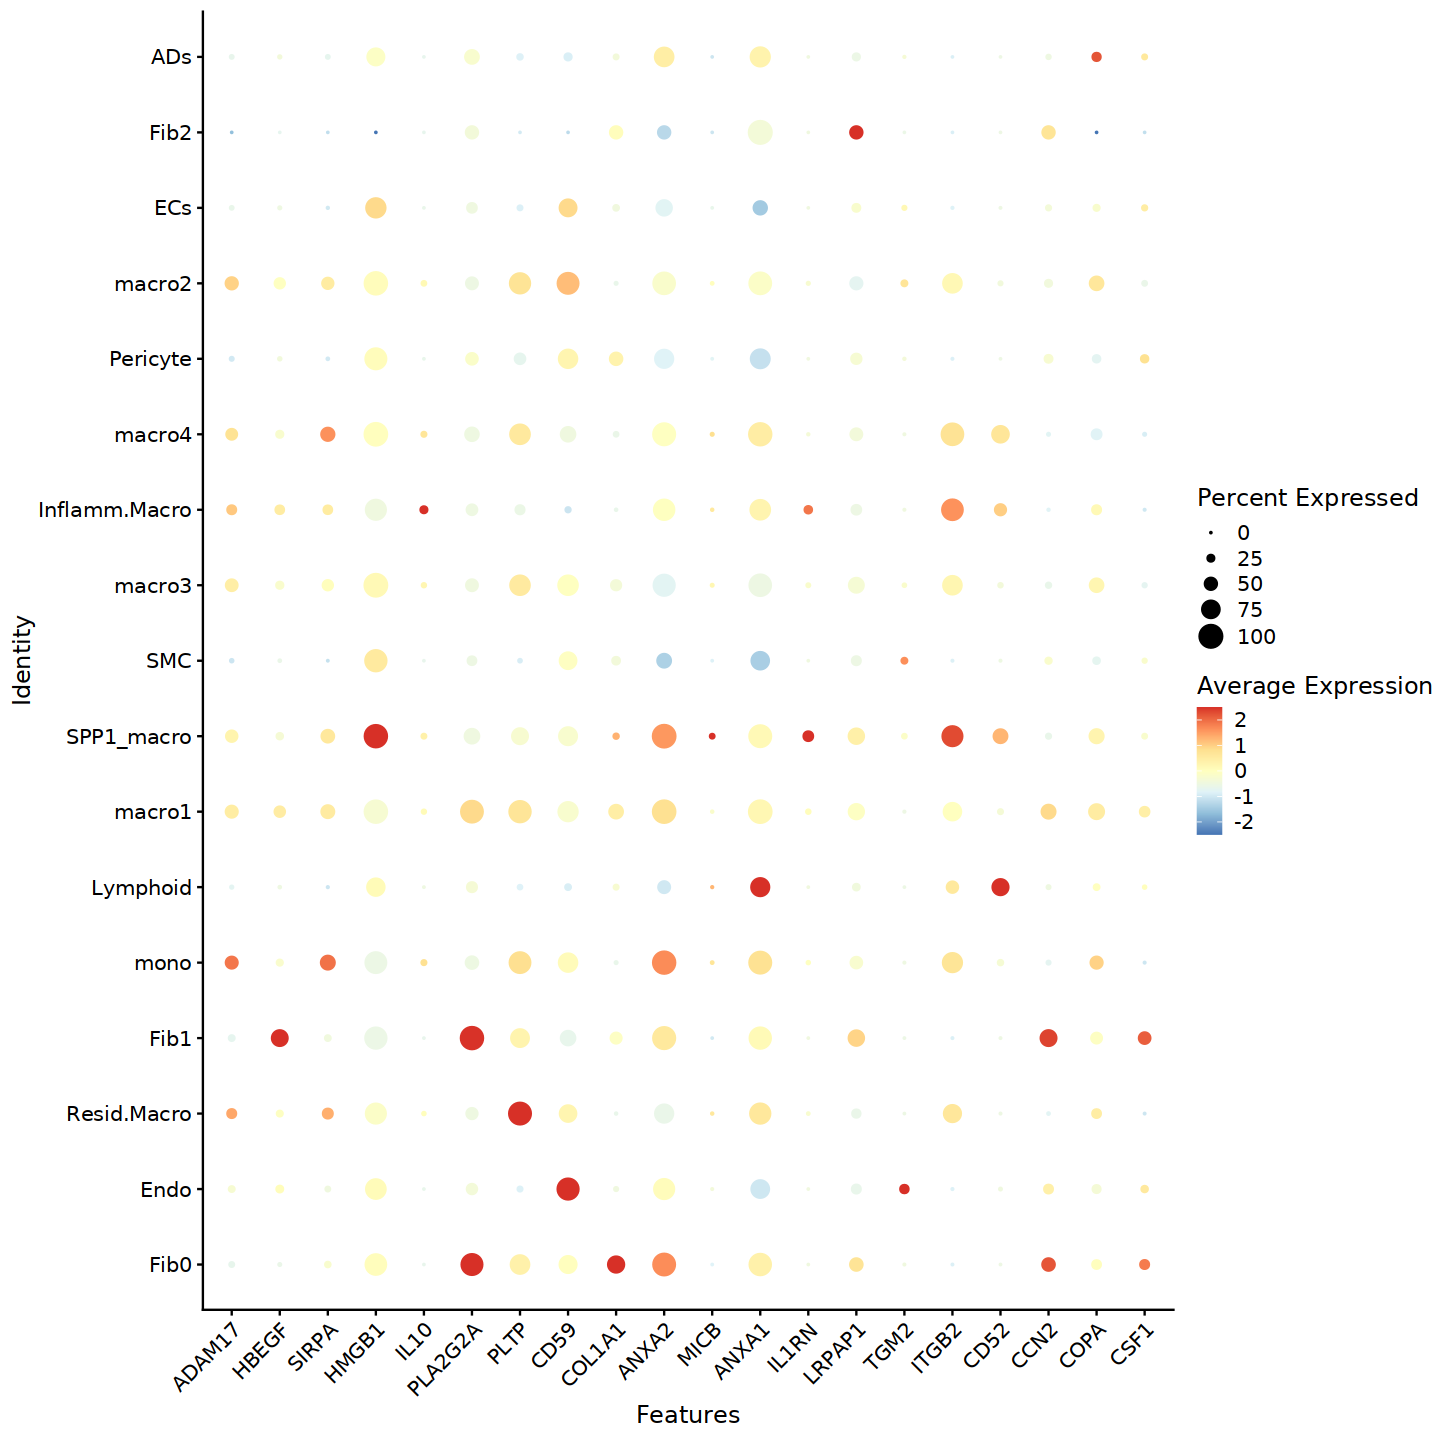

In [47]:
DotPlot(seuratObj, features = nichenet_output$top_ligands %>% rev(), cols = "RdYlBu") + RotatedAxis()

In [48]:
options(repr.plot.width =9,repr.plot.height = 14)

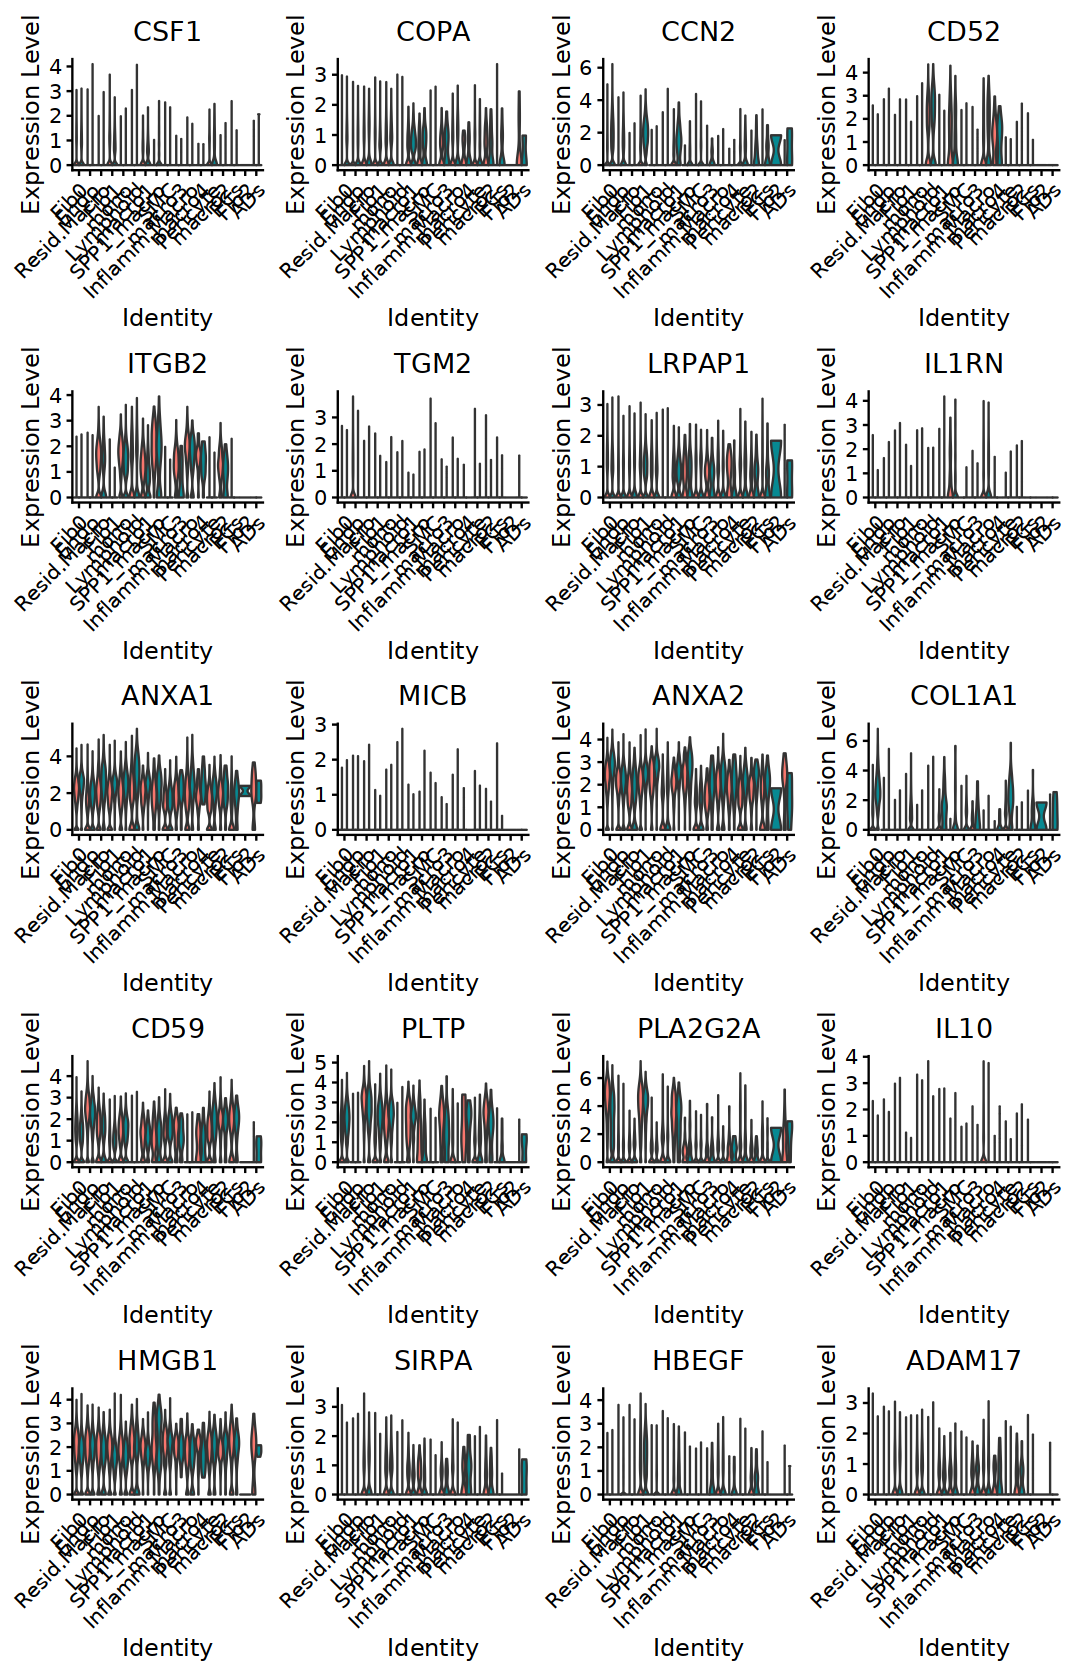

In [49]:
VlnPlot(seuratObj, features = nichenet_output$top_ligands, split.by = "group", pt.size = 0, combine = T)

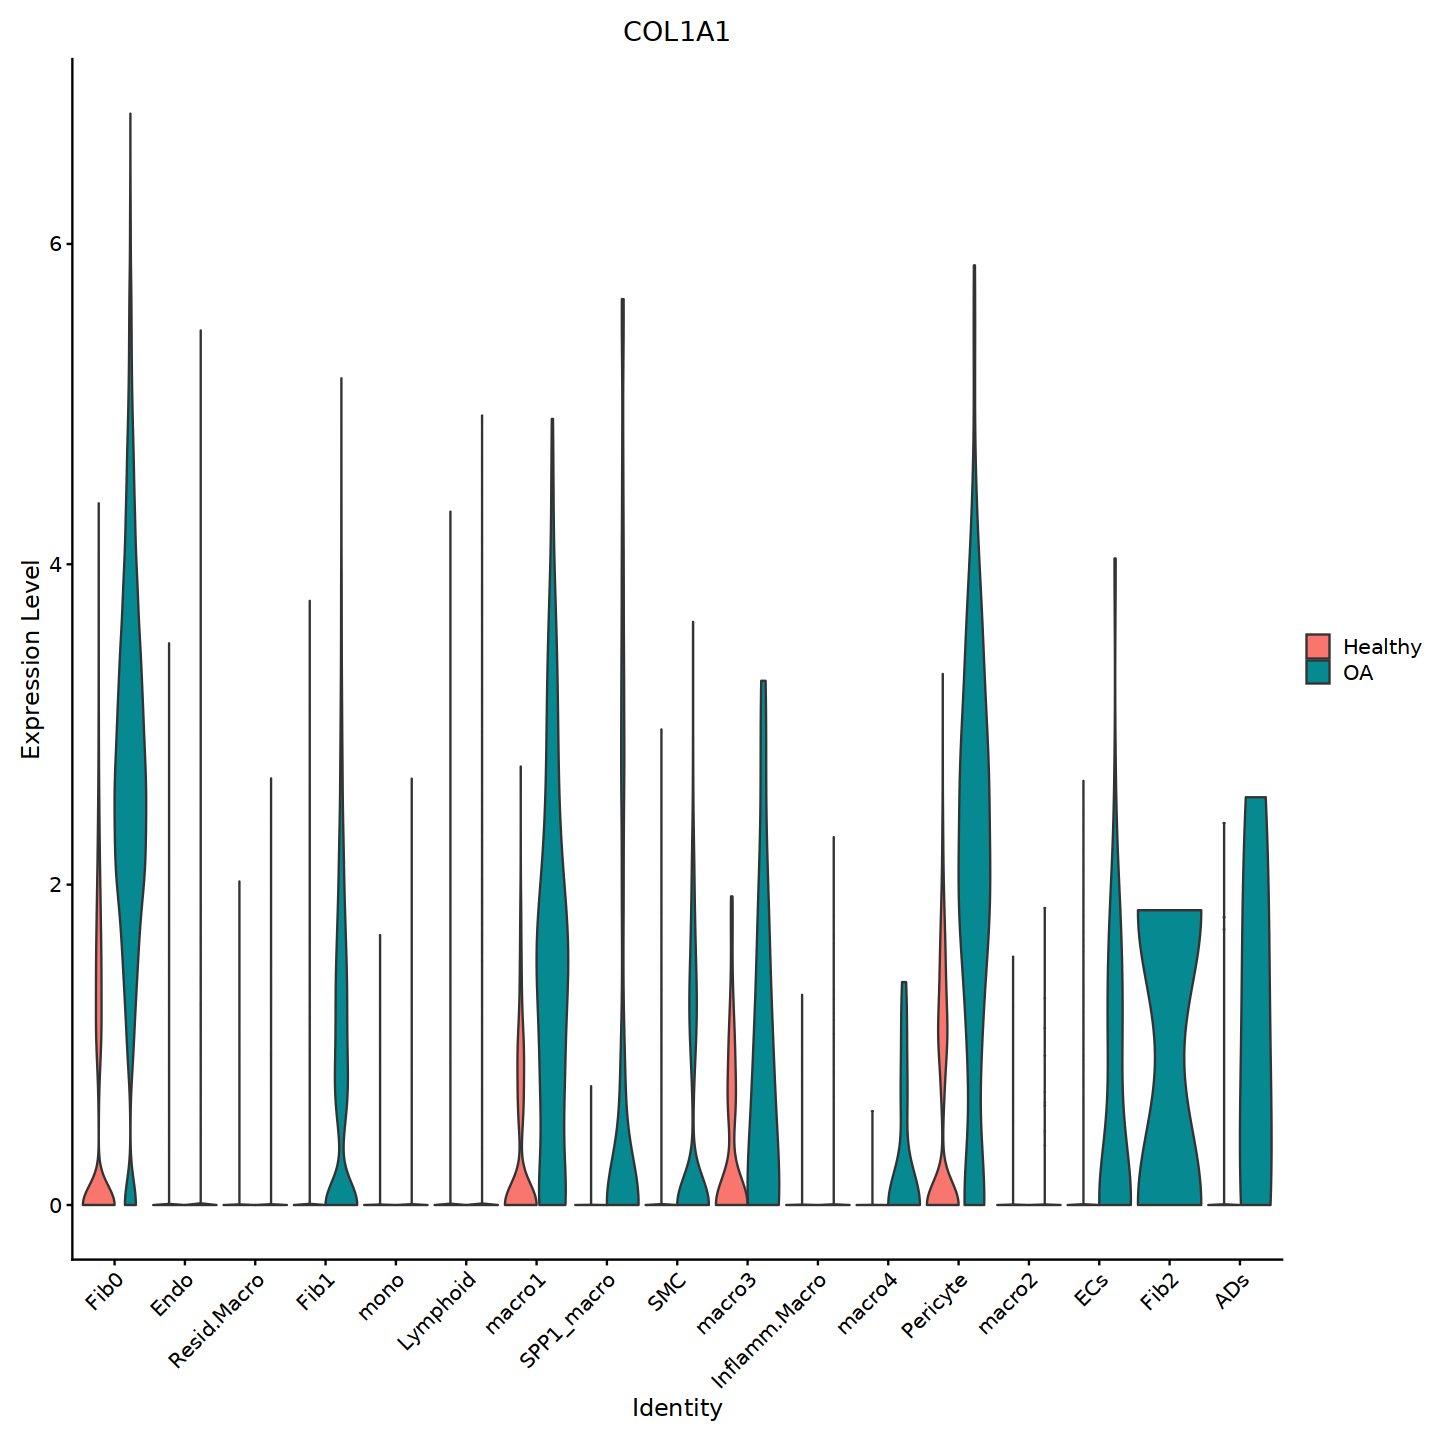

In [59]:
VlnPlot(seuratObj, features = 'COL1A1', split.by = "group", pt.size = 0, combine = T)

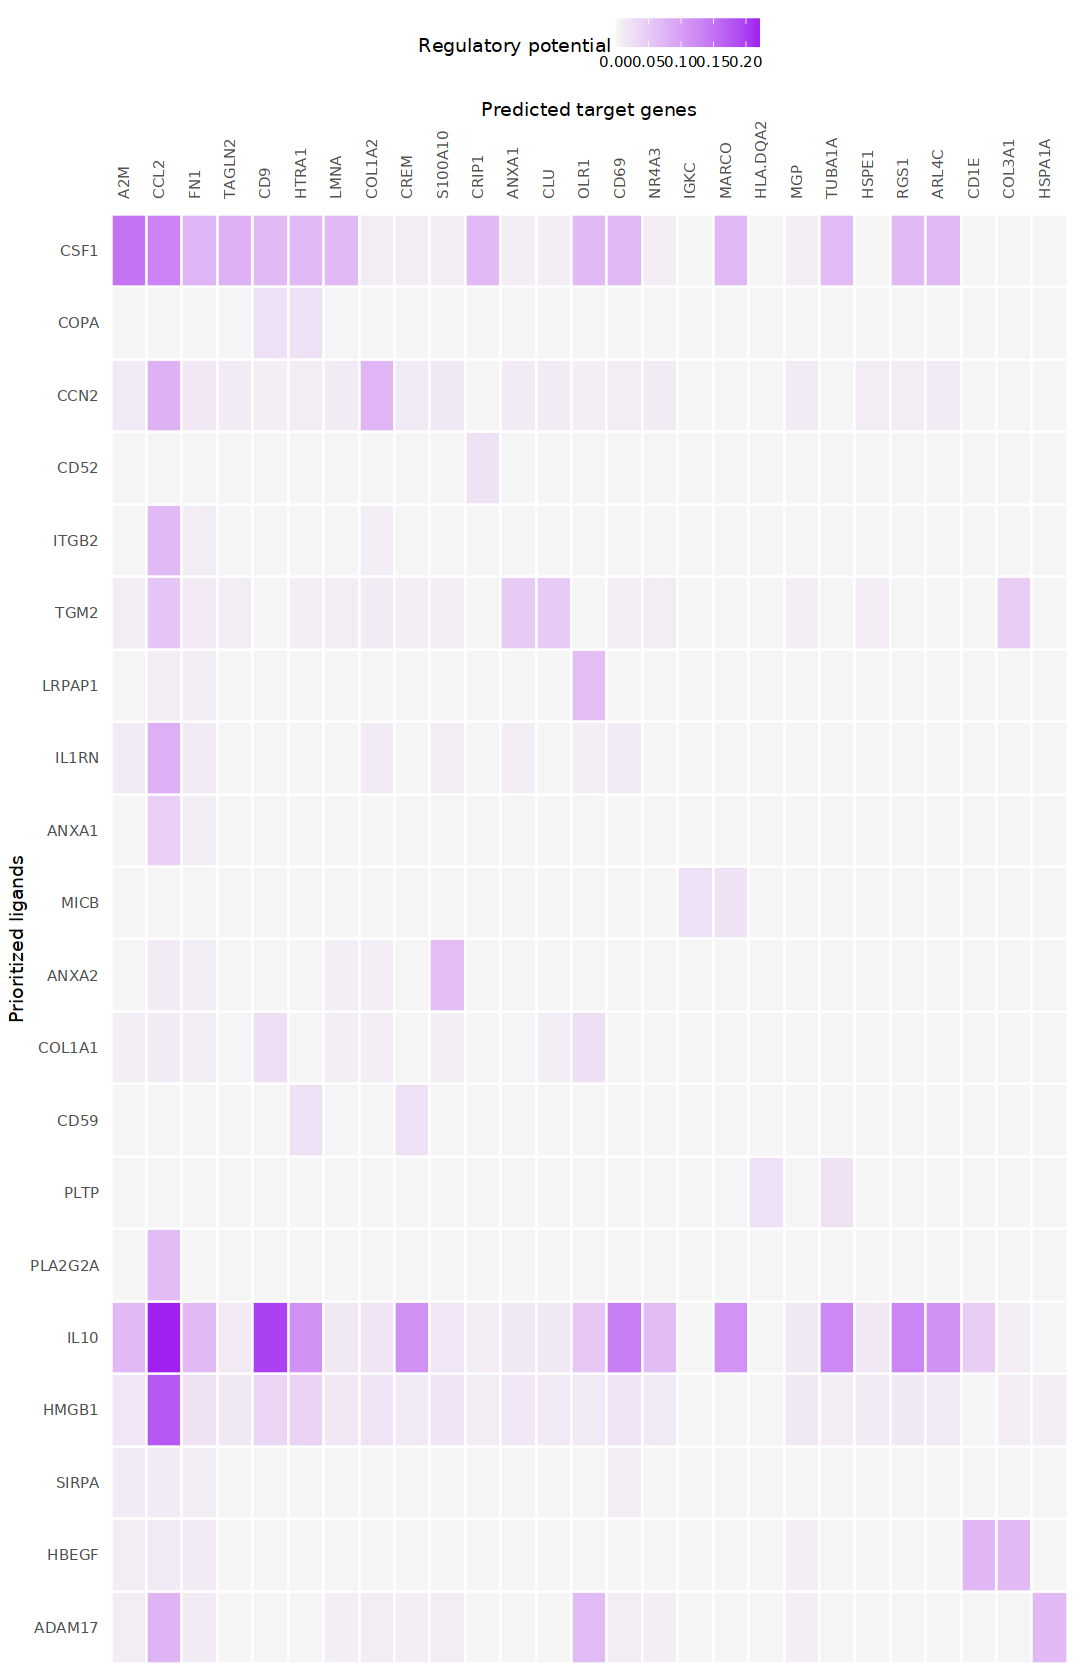

In [50]:
nichenet_output$ligand_target_heatmap

In [51]:
x = nichenet_output$top_targets

In [52]:
x

[1] "A2M"      "CCL2"     "FN1"      "TAGLN2"   "CD9"      "HTRA1"   
 [7] "LMNA"     "COL1A2"   "CREM"     "S100A10"  "CRIP1"    "ANXA1"   
[13] "CLU"      "OLR1"     "CD69"     "NR4A3"    "IGKC"     "MARCO"   
[19] "HLA-DQA2" "MGP"      "TUBA1A"   "HSPE1"    "RGS1"     "ARL4C"   
[25] "CD1E"     "COL3A1"   "HSPA1A"

Warning message:
"Scaling data with a low number of groups may produce misleading results"


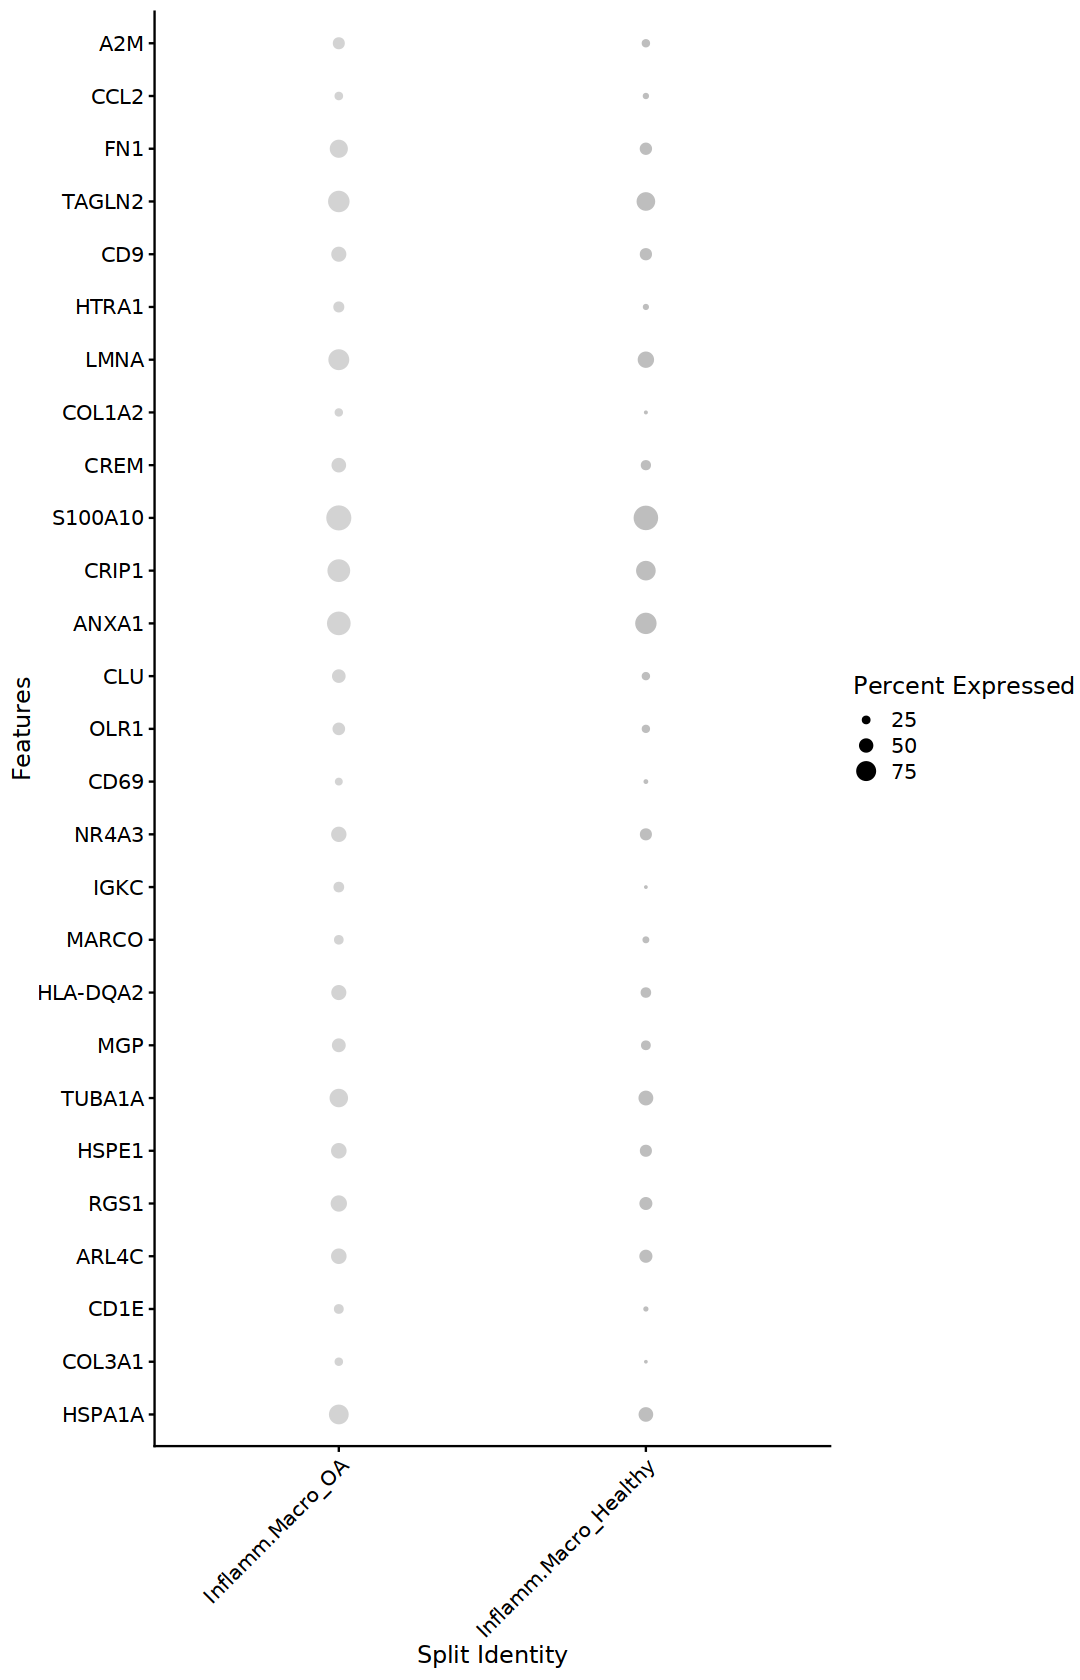

In [53]:
DotPlot(seuratObj %>% subset(idents = "Inflamm.Macro"), features = nichenet_output$top_targets %>% rev(), split.by = "group") +
RotatedAxis()+coord_flip()

In [54]:
options(repr.plot.width = 4,repr.plot.height = 4)

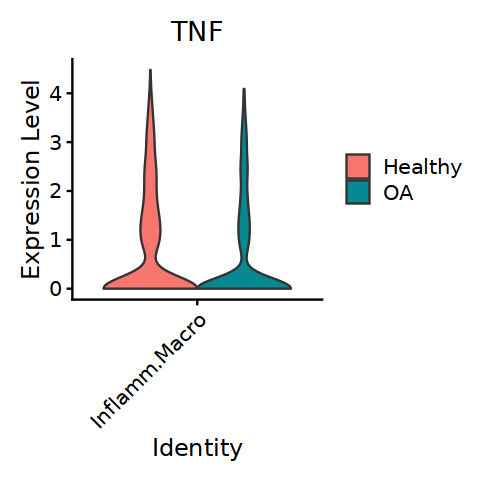

In [55]:
VlnPlot(seuratObj %>% subset(idents = "Inflamm.Macro"), features = c("TNF"),
        split.by = "group",    pt.size = 0, combine = T)

In [56]:
options(repr.plot.width = 12,repr.plot.height = 12)

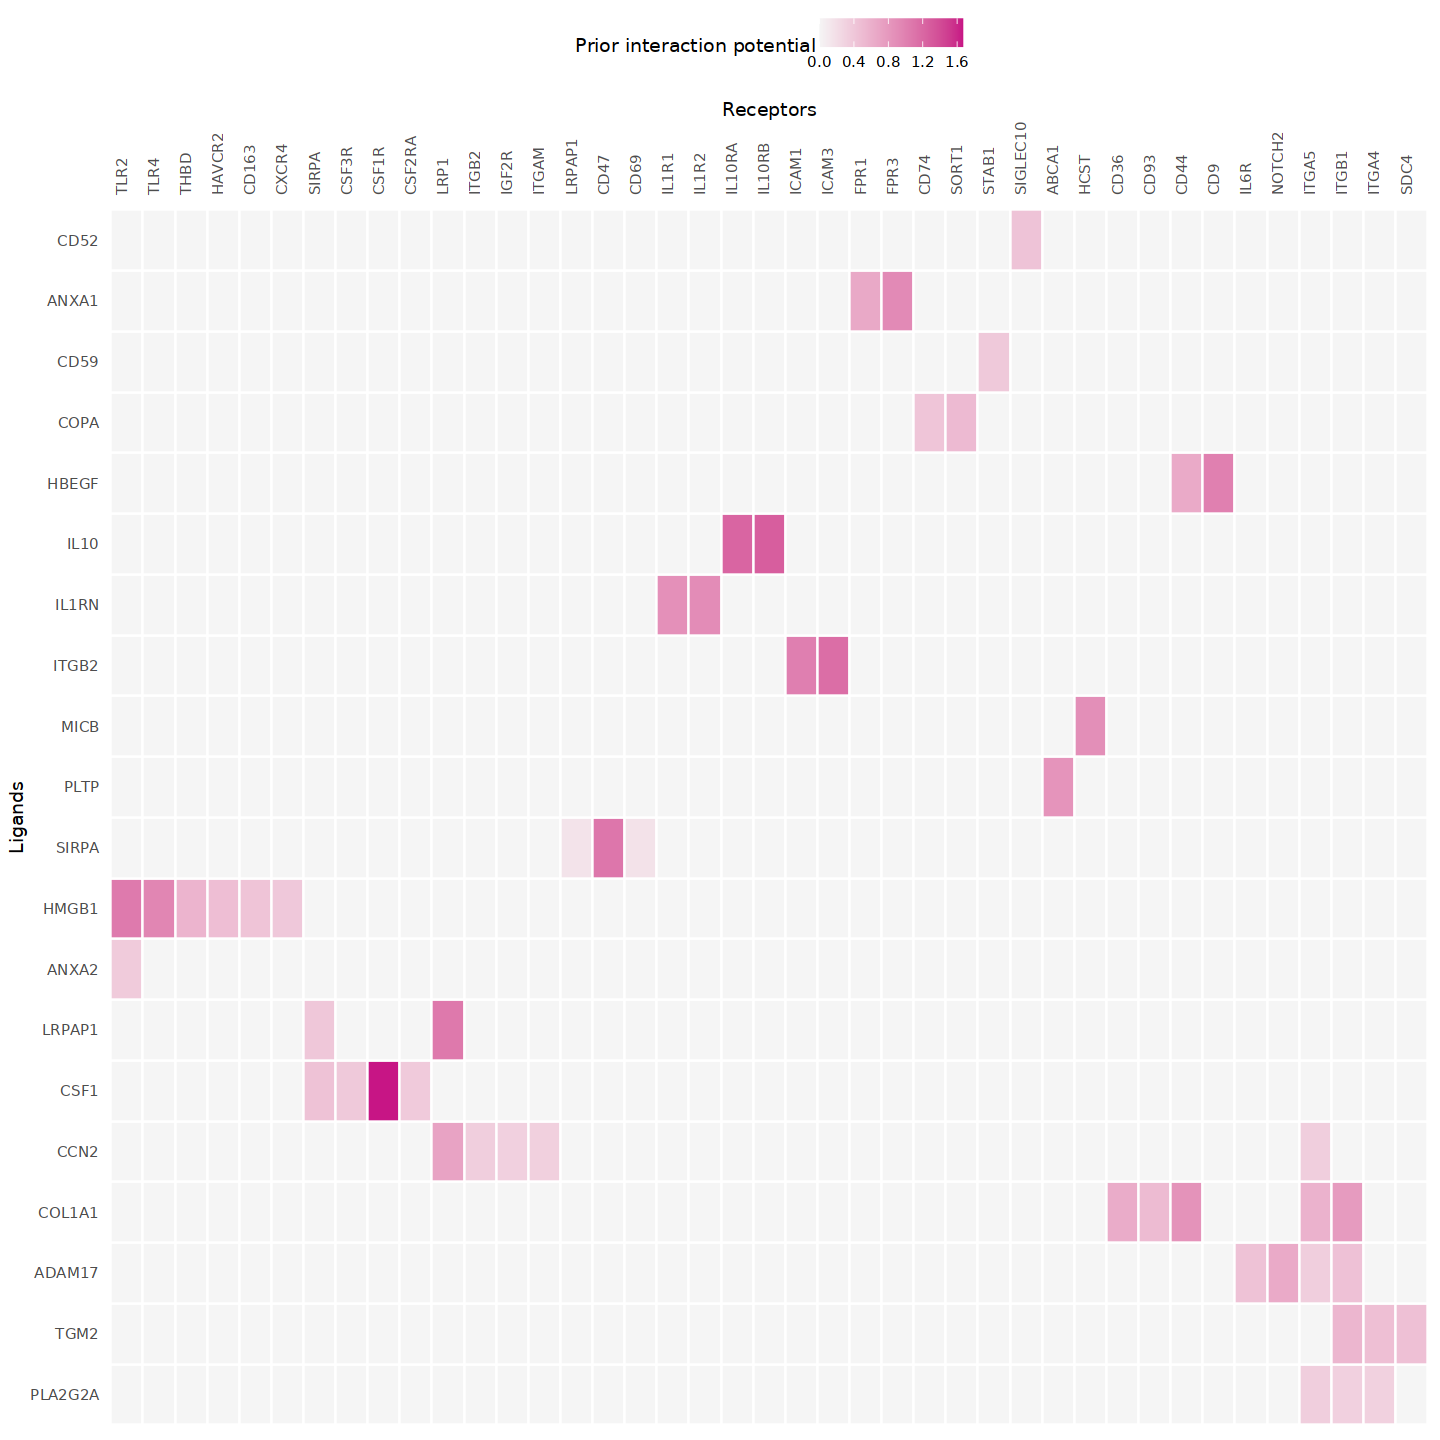

In [57]:
nichenet_output$ligand_receptor_heatmap